In [1]:
import sys, os
import numpy as np

In [2]:
parent_dir = os.path.abspath(os.pardir)
libpath = os.path.join(parent_dir, 'c3dp_source')

if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [3]:
import optimization_mantidReduction as opt
from c3dp.instrument.sampleassembly import makeSAXML

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *


In [4]:
sample_assembly_fileName = 'dac_without_collimator'

Three files are needed to make the sampleassembly file:
    Geometry file (.xml file), 
    unit cell information (.cif file) and 
    scattering kernels file (name-scatterer.xml file) which defines the scattering formula or diffraction peaks

In [5]:
# scatterer = {('anvil', 'shapeAnvil', 'anvil', 'C', 'cif'),
#             ('gasket_sample', 'shapeGasket', 'gasket_at_sample', 'Fe3Cr', 'cif'),
#             ('gasket_anvil', 'shapeGasket2', 'gasket_at_anvil', 'Al', 'xyz'),
#             ('seat_piston', 'shapeSP', 'vision_seat_piston', 'Fe3Ni', 'cif'),
#             ('bar', 'shapeBar', 'bar', 'Cu', 'cif' ),
#             ('sample', 'shapeSample', 'sample_dac', 'Si', 'xyz')
             
#             }

scatterer = {('anvil', 'shapeAnvil', 'anvil', 'C', 'cif'),
            ('gasket_sample', 'shapeGasket', 'gasket_at_sample', 'Fe3Cr', 'cif'),
            ('gasket_anvil', 'shapeGasket2', 'gasket_at_anvil', 'Al', 'xyz'),
            ('seat_piston', 'shapeSP', 'vision_seat_pistion', 'Fe3Ni', 'cif'),
            ('bar', 'shapeBar', 'bar', 'Cu', 'cif' ),
            ('sample', 'shapeSample', 'sample_dac', 'Si', 'xyz')
             
            }
makeSAXML(sample_assembly_fileName, scatterer)


()

In [6]:
cell=opt.PresureCell()
cell.parameters(ncount=1e6,source_file='Neutrons_mcvine.dat', 
                sampleassembly_fileName=sample_assembly_fileName, sourceTosample_z=0.02)

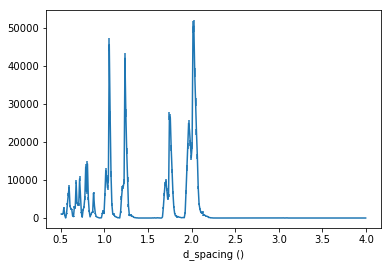

CPU times: user 2min 16s, sys: 1min 26s, total: 3min 42s
Wall time: 2min 37s


In [7]:
%%time
diffraction_pattern_DAC = cell.diffraction_pattern_calculation ()